In [9]:
import tensorflow as tf
print(tf.__version__)  # for Python 3
import keras

1.14.0


In [20]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data() 
len(X_train), len(X_test) # 60,000 images in x_train, 10,000 images in x_test

(60000, 10000)

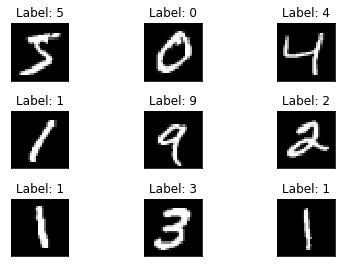

In [11]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(3,3,i+1) # 3 x 3 plot and indexing and plotting each one
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none') # converts array to image
  plt.title("Label: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [12]:
from tensorflow.keras import backend as k

# Data must be reshaped as Keras requires a channel dimension

print("Shape of single X_train image:", X_train[0].shape) # Requires 1 at the beginning or end of shape

# Input image dimensions
img_rows, img_cols = 28, 28

# An ENTIRE DATASET can be reshaped with "channels_first" or "channels_last", and this can be determined by checking the string 
# k.image_data_format() ==> must be reshaped separately according to this"

# For 3D data, "channels_last"  assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#              "channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3)

if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Normalization (Scale input features between 0.0 and 1.0)
# 255 is the maximum value of a byte
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255
print('X_train shape:', X_train.shape) # X_train shape: (60000, 28, 28, 1)

Shape of single X_train image: (28, 28)
X_train shape: (60000, 28, 28, 1)


In [13]:
from keras.utils import to_categorical

# Set number of categories
num_category = 10

# One-Hot Encode Data
y_train = to_categorical(y_train, num_category)
y_test = to_categorical(y_test, num_category)

In [14]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Softmax, Dropout
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

# Sequential Model is linear stack of layers according to Keras
model = Sequential()

# Convolutional layer with relu activation with 32 convolution filters of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# 64 convolution filters of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))

# choose the best features via pooling by taking the max value of a filter
model.add(MaxPooling2D(pool_size=(2, 2)))

# randomly turn neurons on and off to decrease reliance on certain neurons
model.add(Dropout(0.25))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# fully connected layer with 128 nodes & relu activation function
model.add(Dense(128, activation='relu'))

# use another Dropout Layer 
model.add(Dropout(0.5))

# use softmax to obtain probabilities of classes
model.add(Dense(num_category, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
# Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
# Categorical Cross Entropy as we have multiple classes
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [16]:
batch_size = 128
num_epoch = 10

# Train Model
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.2736 - acc: 0.9155 - val_loss: 0.0584 - val_acc: 0.9809
Epoch 2/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0885 - acc: 0.9736 - val_loss: 0.0388 - val_acc: 0.9858
Epoch 3/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0650 - acc: 0.9806 - val_loss: 0.0343 - val_acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0554 - acc: 0.9832 - val_loss: 0.0315 - val_acc: 0.9884
Epoch 5/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0464 - acc: 0.9859 - val_loss: 0.0276 - val_acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0420 - acc: 0.9874 - val_loss: 0.0313 - val_acc: 0.9900
Epoch 7/10
60000/60000 [====

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0]) # FINAL TEST LOSS: 0.025562659024365348
print('Test Accuracy:', score[1]) # FINAL TEST ACCURACY: 0.9916

Test Loss: 0.025562659024365348
Test Accuracy: 0.9916


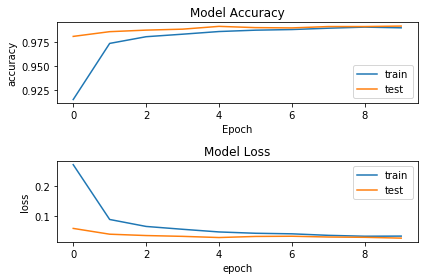

In [18]:
import os
# model accuracy plot
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

# model loss plot
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [19]:
# Save JSON config to disk
json_config = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(json_config)
    
# Save weights to disk
model.save_weights("model_digit.h5")
print("Saved Model to Disk...")

Saved Model to Disk...
